# Eating In, Working Out Rapid EDA & MLR

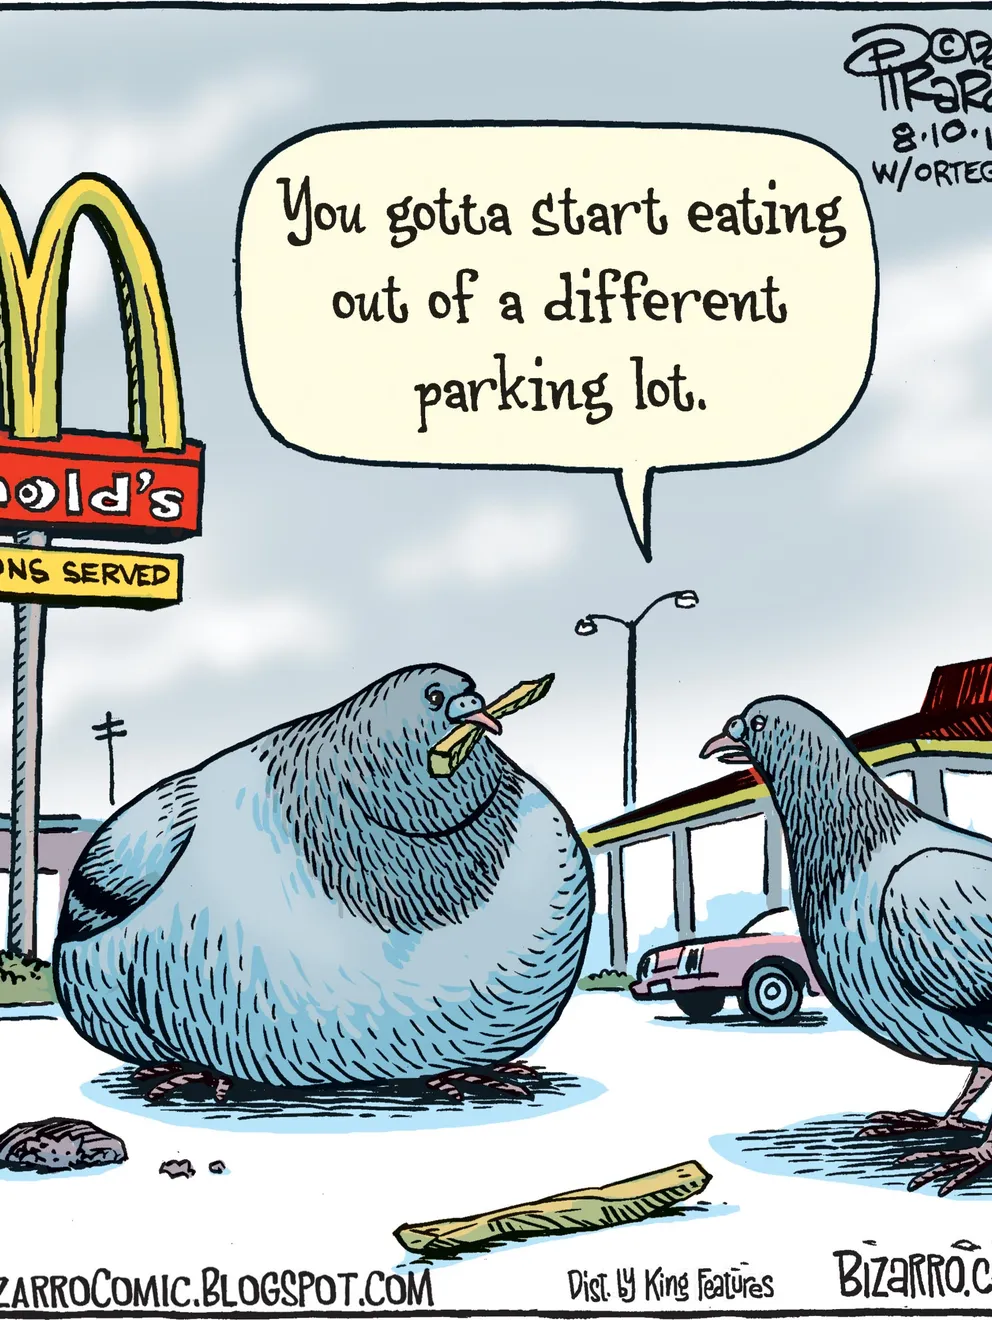

Dan Piraro, King Features Syndicate, Cartoonist Group

## Data Preparationg and Exploration

### Load & Inspect Data

In [50]:
#Imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

Let's begin our process formally by getting access to both of our datasets: the calories dataset and the exercise dataset.

In [3]:
exercise_df = pd.read_csv('exercise.csv')
exercise_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [7]:
exercise_df.shape

(15000, 8)

In [5]:
calories_df = pd.read_csv('calories.csv')
calories_df.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [9]:
calories_df.shape

(15000, 2)

- Two columns with simple and straighforward data

In [11]:
merge_df = pd.merge(exercise_df, calories_df, on="User_ID")
merge_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [12]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [13]:
merge_df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


The summary statistics reveal the following:

- Age ranges from 20 to 79, with an average around 42.
- Height and Weight vary significantly, with an average height of about 174 cm and weight of approximately 74/75 kg.
- Duration of exercise sessions is widely spread, with a mean of about 15 minutes, but some sessions are as short as 1 minute.
- Calories burned has a substantial range (1 to 314), suggesting that factors like Duration and Heart_Rate might be influential in calorie expenditure.


### Feature Engineering

In [42]:
# Interaction Terms
merge_df['Duration_Heart_Rate'] = merge_df['Duration'] * merge_df['Heart_Rate']
merge_df['Duration_Heart_Rate']

0        3045.0
1        1316.0
2         440.0
3        1300.0
4         810.0
          ...  
14995    1012.0
14996     510.0
14997    1440.0
14998     168.0
14999    1656.0
Name: Duration_Heart_Rate, Length: 15000, dtype: float64

Adding Duration_Heart_Rate as an interaction term helps capture how the combination of exercise duration and heart rate might jointly influence the target variable. 

In [54]:
# Log Transformation for Body Temperature
merge_df['Log_Body_Temperature'] = np.log(merge_df['Body_Temp'] + 1)  # Adding 1 to avoid log(0)



Divides Body_Temperature into distinct categories, which can help interpret variations in temperature as categorical influences rather than continuous ones

## Exploratory Data Analysis (EDA)

### Data Visualizations using histograms 

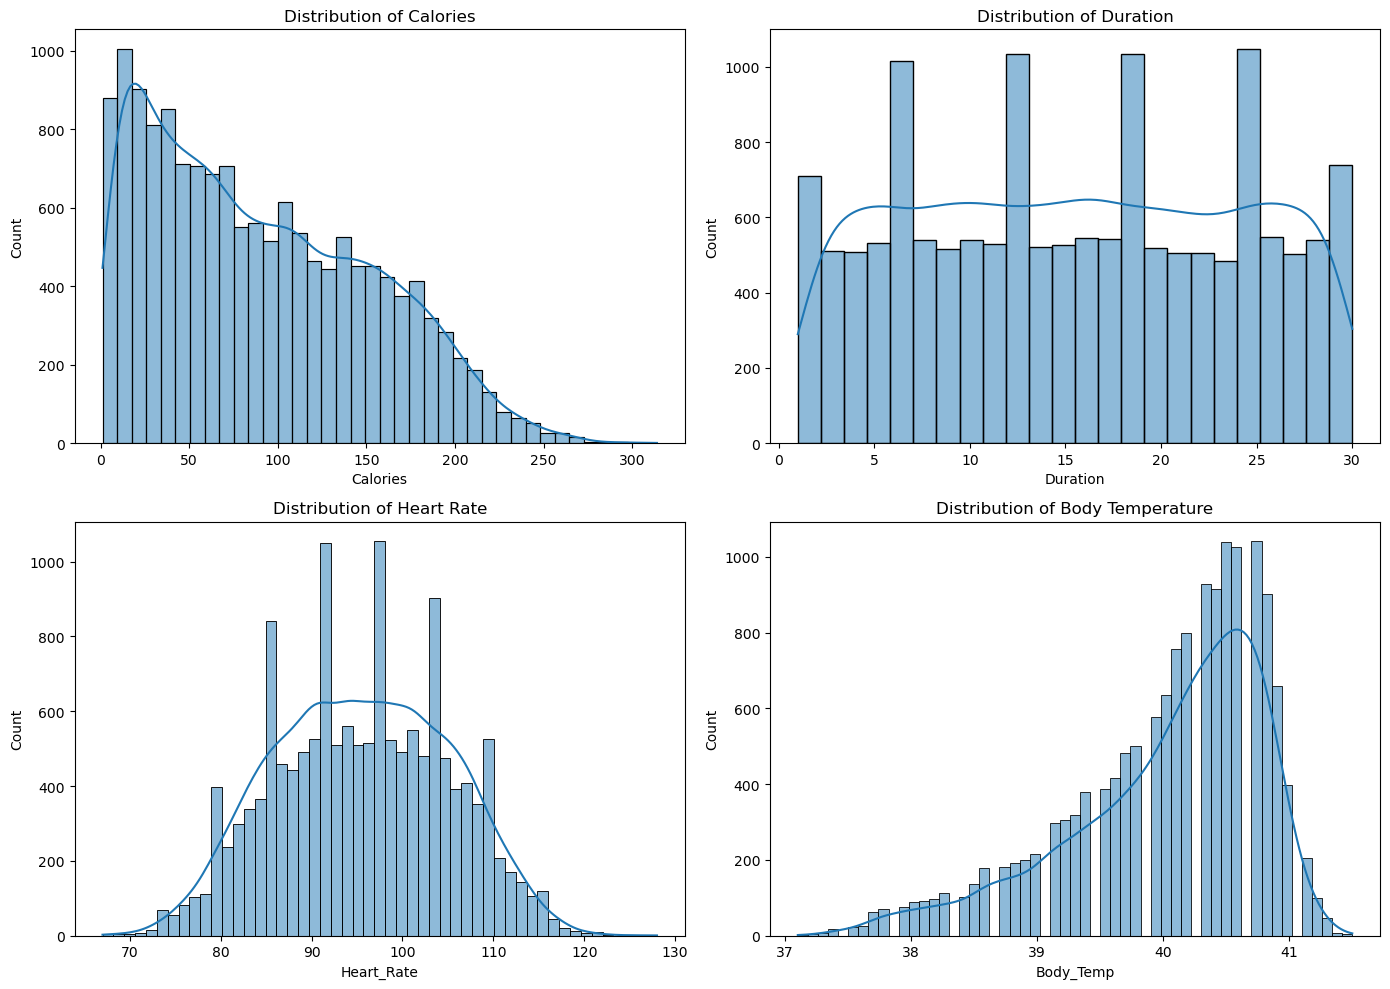

In [16]:
# Setting up plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(merge_df['Calories'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Calories')

sns.histplot(merge_df['Duration'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Duration')

sns.histplot(merge_df['Heart_Rate'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Heart Rate')

sns.histplot(merge_df['Body_Temp'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Body Temperature')

plt.tight_layout()
plt.show()

The histograms show the distributions for key features:

- Calories: The right-skewed distribution indicates that while most exercise sessions burned fewer calories, there are some outliers where users burned significantly more.
- Duration: A uniform distribution implies that all exercise durations are almost equally likely, without a clear preference or peak in the duration.
- Heart Rate: The bell-shaped (normal) distribution of heart rate suggests that most exercise sessions had heart rates around a central average, with fewer sessions at very low or very high heart rates.
- Body Temperature: The left-skewed distribution shows that body temperature often hovers around a higher level, with fewer instances of lower body temperatures.

## Correlation Matrix 

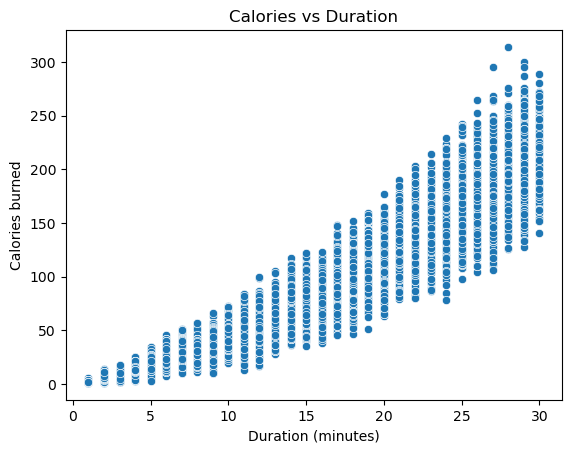

In [21]:
# Scatter plot for Calories vs Duration
sns.scatterplot(x='Duration', y='Calories', data=merge_df)
plt.title('Calories vs Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Calories burned')
plt.show()

Positive Strong Correlation: The longer someone exercises, the more calories they burn because more time spent moving requires more energy.


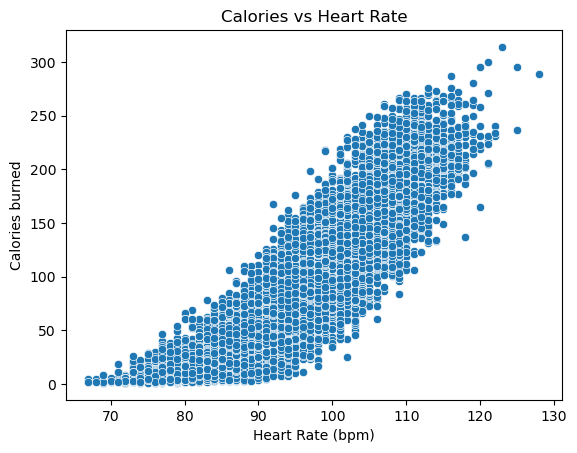

In [22]:
# Scatter plot for Calories vs Heart Rate
sns.scatterplot(x='Heart_Rate', y='Calories', data=merge_df)
plt.title('Calories vs Heart Rate')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Calories burned')
plt.show()

Higher heart rates are associated with higher calorie burn. When your heart beats faster, your body is working harder, using more energy and burning more calories.

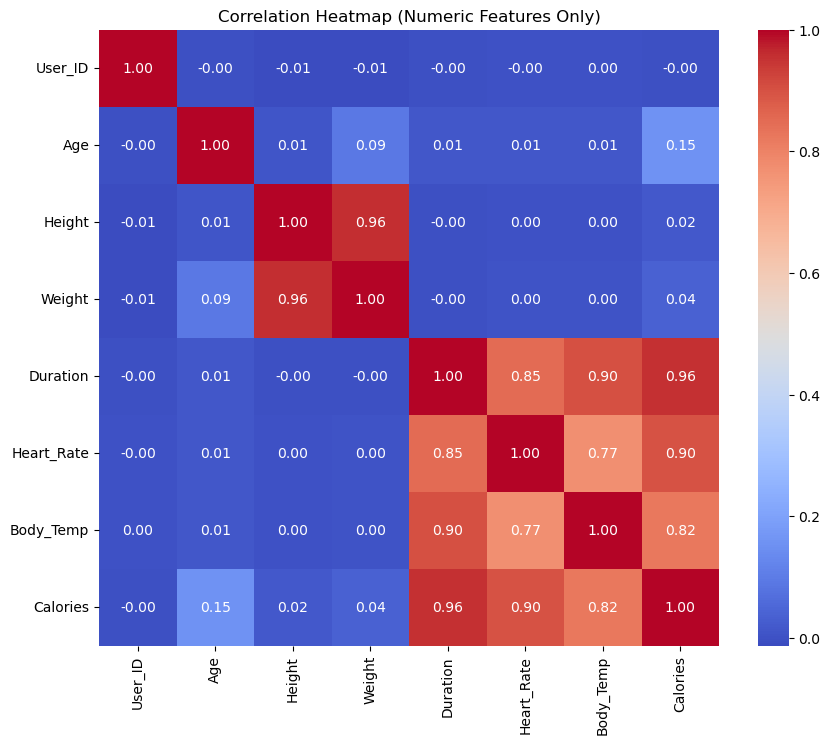

In [23]:
# Drop the Gender column to focus on numeric data
numeric_data = merge_df.drop(columns=['Gender'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


## Multiple Linear Regression (MLR)

In [24]:
# Define predictors and target variable
X = numeric_data[['Duration', 'Heart_Rate', 'Body_Temp']]
y = numeric_data['Calories']

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_test, y_test

(       Duration  Heart_Rate  Body_Temp
 9839        7.0        81.0       39.5
 9680       26.0       110.0       40.5
 7093       12.0        88.0       40.1
 11293       9.0        77.0       39.5
 820         5.0        90.0       39.0
 ...         ...         ...        ...
 5191       22.0       104.0       40.6
 13418      20.0       104.0       40.7
 5390        8.0        90.0       39.5
 860        12.0        97.0       40.2
 7270       16.0        91.0       40.5
 
 [12000 rows x 3 columns],
        Duration  Heart_Rate  Body_Temp
 11499      26.0       107.0       40.6
 6475       29.0       111.0       40.5
 13167      11.0        90.0       40.0
 862        24.0       108.0       40.8
 5970       29.0       116.0       41.1
 ...         ...         ...        ...
 6216       28.0       106.0       41.0
 3585       10.0        92.0       40.0
 10023      20.0       104.0       40.2
 14044       5.0        86.0       39.2
 12965      29.0       116.0       41.2
 
 [3000 ro

In [33]:
# Instantiate and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [30]:
# Predict on test data
y_pred = model.predict(X_test)
y_pred

array([172.03946825, 201.5815061 ,  48.82973852, ..., 133.05426912,
        14.56718228, 199.82433718])

In [28]:
# Evaluate the model
r_squared = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("R-squared:", r_squared)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared: 0.9464584932015652
Root Mean Squared Error (RMSE): 14.69974002561638


/opt/anaconda3/envs/cohort_env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- R-squared (0.95): This means our model explains about 95% of the variation in calories burned based on the three factors we included: Duration, Heart Rate, and Body Temperature. A very high R-squared suggests this model is quite effective in predicting calorie burn from these factors.

- RMSE (14.7): This tells us that, on average, our model’s predictions are off by about 14.7 calories, which is relatively low given the range of calorie values in the data.

In [29]:
# Print model coefficients for interpretation
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)


      Feature  Coefficient
0    Duration     6.617209
1  Heart_Rate     2.002294
2   Body_Temp   -16.812343


- Duration (6.62): For each additional minute of exercise, calorie burn increases by approximately 6.6 calories, assuming Heart Rate and Body Temperature remain constant.
- Heart Rate (2.00): For each additional beat per minute in heart rate, calorie burn increases by about 2 calories, assuming Duration and Body Temperature stay constant.
- Body Temperature (-16.81): An increase in body temperature is associated with a slight decrease in calories burned. This might seem counterintuitive, but it could suggest that as the body temperature reaches higher levels, the body conserves energy slightly to prevent overheating.

## Non-Technical Interpretation:
The more time you spend exercising and the higher your heart rate goes, the more calories you’re likely to burn.
Our model shows that exercise duration has the biggest impact, followed by heart rate. Body temperature has a minor effect, but it seems to slightly reduce calorie burn as it rises, potentially because the body might slow down or conserve energy to keep from overheating.

### Next Steps for Analysis and Model Improvement:
- Collect more data on other factors that could impact calorie burn, like exercise type, intensity, and environmental factors (e.g., temperature of the workout setting).
- Since body temperature showed a negative effect, it could be interesting to explore if there’s an optimal range of temperature for efficient calorie burning, especially with different workout intensities.
- Validate with More Data

### Updated Model including heart rate duration and log body temp.

In [55]:
# Selecting features, including interaction and transformed features
X = merge_df[['Duration', 'Heart_Rate', 'Duration_Heart_Rate', 'Log_Body_Temperature']]
y = merge_df['Calories'] 

# Fit the model
model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                 9.489e+04
Date:                Tue, 05 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:02:51   Log-Likelihood:                -58775.
No. Observations:               15000   AIC:                         1.176e+05
Df Residuals:                   14995   BIC:                         1.176e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -31.7969 

The significant predictors include Duration and the interaction term Duration_Heart_Rate, both with p-values of 0.000, indicating a strong relationship with calories burned. However, the Heart_Rate and Log_Body_Temperature variables do not show significant effects, as their p-values are greater than 0.05, suggesting they may not be reliable predictors in this model.

### Classification Approach - Categorizing Calorie Burn

In [36]:
#Defining target classes based on Low burn (Calories <= median) vs High burn (Calories > median)
median_calories = merge_df['Calories'].median()
merge_df['Calorie_Burn_Class'] = (merge_df['Calories'] > median_calories).astype(int)


In [37]:
# Split data
X = merge_df[['Duration', 'Heart_Rate', 'Body_Temp']]
y = merge_df['Calorie_Burn_Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Train logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9596666666666667
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1463
           1       0.96      0.96      0.96      1537

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000



- Accuracy (0.96 or 96%): 96% of the time, the model correctly classified whether a workout session burned above or below the median calorie threshold
- 0: Represents sessions with “Low Calorie Burn” (below the median).
- 1: Represents sessions with “High Calorie Burn” (above the median).
- Precision: model was correct 96% of the time for low calorie and high calorie burn
- A high F1-score (like 0.96 for both classes here) shows the model is accurate and consistently reliable across both classes.

## Non-Technical Interpretation:

This model is highly effective at predicting whether a workout will be low or high in calories burned. With 96% accuracy, it’s correctly identifying the calorie burn level nearly all the time. This means users could rely on this model to get accurate feedback about their workout intensity based on duration, heart rate, and body temperature.